###TITLE OF PROJECT :- CAR NUMBER PLATE DETECTION USING MACHINE LEARNING###

###OBJECTIVE OF THE PROJECT###

In [ ]:
"""The objective of printing car number plates using machine learning is to develop a robust and accurate system that can automatically
recognize and extract the alphanumeric characters from a car's license plate image and generate a high-quality printed version of the number
plate. This system aims to achieve the following objectives:
1.Automatic Number Plate Recognition (ANPR).
2.Data Preprocessing.
3.Character Segmentation.
4.Character Recognition.
5.Text Generation.
6.Printing Process,and
7.Performance Evaluation."""

###DATA SOURCE :- DOWNLOADING CAR IMGAE FROM INTERNET###

###IMPORTING REQUIRED LIBRARIES###

In [1]:
!pip install easyocr
!pip install imutils


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 15.2 MB/s eta 0:00:00


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

###IMPORTING DATA###

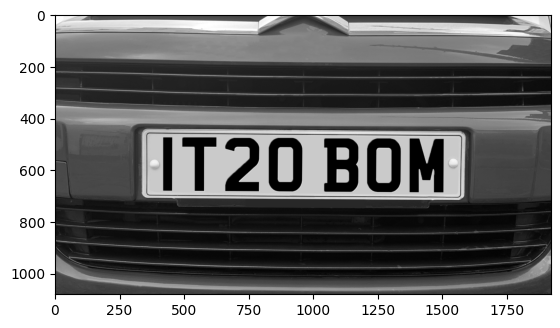

In [4]:
img = cv2.imread('bom-car-number-plate-background.png')
gray =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

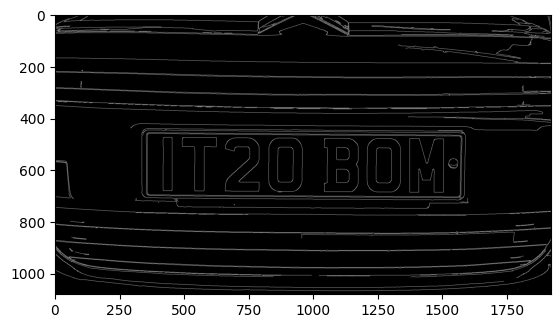

In [5]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [6]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [7]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [8]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

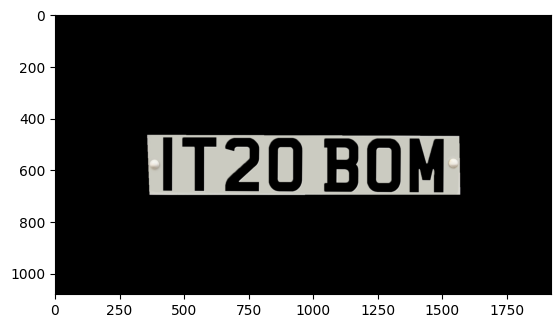

In [9]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [11]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

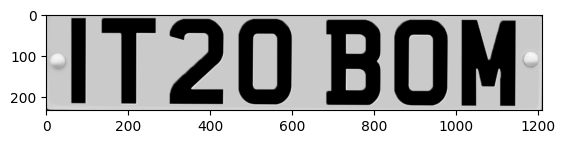

In [12]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [13]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[30, 0], [1165, 0], [1165, 232], [30, 232]],
  'Itz0 BOM',
  0.4138526002244355)]

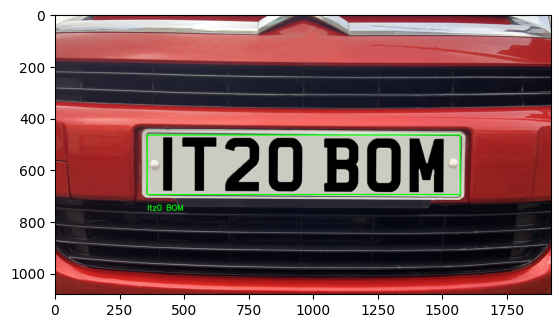

In [14]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))